Weyl semimetals

Computational supplement to theory

In [2]:
import weyl_tools as wt
import weyl_berry as wb
import weyl_green as wg
import weyl_spins as ws
import weyl_selfenergy as wse
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import scipy.sparse.linalg as ssl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
base_path = "/Users/leogoutte/Desktop/Masters Research/Code and notebooks"

## Bulk model

$H = t_x \sin{k_x} \sigma_x + t_y \sin{k_y} \sigma_y + t_z \left(2 + \gamma -\cos{k_x}-\cos{k_y}-\cos{k_z} \right) \sigma_z $

In [100]:
ks,es=wt.BulkSpectrum(100,0,0,1,1,1,0)

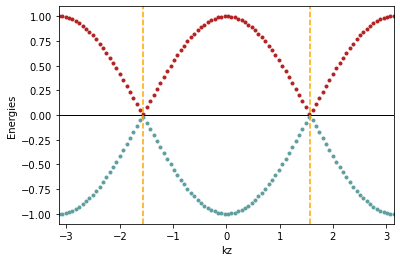

In [101]:
plt.figure()
plt.axhline(y=0,ls='-',c='k',lw=1)
plt.axvline(x=np.arccos(0),ls='--',c='orange')
plt.axvline(x=-np.arccos(0),ls='--',c='orange')
plt.scatter(ks[es>0],es[es>0],marker='.',c='firebrick')
plt.scatter(ks[es<=0],es[es<=0],marker='.',c='cadetblue')
plt.xlabel("kz")
plt.ylabel("Energies")
plt.xlim((-np.pi,np.pi))
plt.show()

### Vary $\gamma$'s

In [150]:
gammas = [-1.5,-1,-0.5,0,0.5,1,1.5]
ks_gamma, Es_gamma = wt.FlipGammas(gammas=gammas,
                                  res=100, kx=0, ky=0, tx=1, ty=1, tz=1)

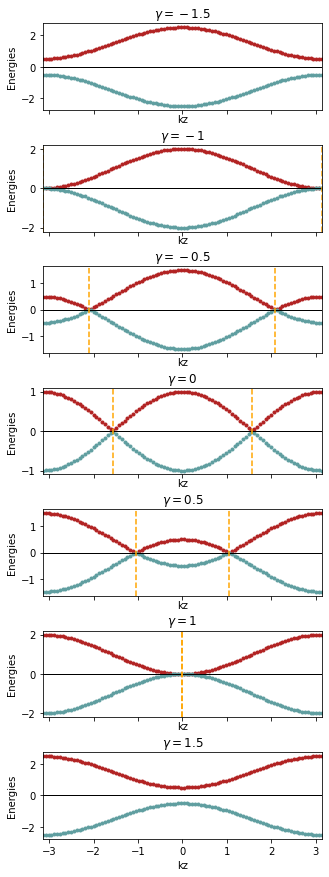

In [151]:
fig, ax = plt.subplots(ncols=1,nrows=len(gammas),sharex=True,figsize=(5,15))
plt.subplots_adjust(hspace=0.4)

for i in range(len(gammas)):
    ks = ks_gamma[:,i]
    Es = Es_gamma[:,i]
    g = gammas[i]
    ax[i].set_title("$\gamma = {}$".format(g))
    ax[i].axhline(y=0,ls='-',c='k',lw=1)
    ax[i].axvline(x=np.arccos(g),ls='--',c='orange')
    ax[i].axvline(x=-np.arccos(g),ls='--',c='orange')
    ax[i].scatter(ks[Es>0],Es[Es>0],marker='.',c='firebrick')
    ax[i].scatter(ks[Es<=0],Es[Es<=0],marker='.',c='cadetblue')
    ax[i].set_xlabel("kz")
    ax[i].set_ylabel("Energies")
    ax[i].set_xlim((-np.pi,np.pi))

### Sum over $k_x$

In the WSM phase:

In [131]:
kzs_summed, Es_summed = wt.BulkSpectrumSummedOver(100,0,1,1,1,-0)

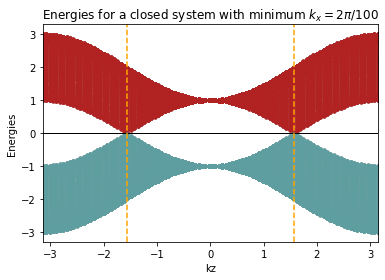

In [132]:
plt.figure()
plt.title("Energies for a closed system with minimum $k_x = 2\pi / 100$")
plt.axhline(y=0,ls='-',c='k',lw=1)
plt.axvline(x=np.arccos(0),ls='--',c='orange')
plt.axvline(x=-np.arccos(0),ls='--',c='orange')
plt.scatter(kzs_summed,Es_summed,marker='.',c='darkgrey')
plt.scatter(kzs_summed[Es_summed>0],Es_summed[Es_summed>0],marker='.',c='firebrick')
plt.scatter(kzs_summed[Es_summed<=0],Es_summed[Es_summed<=0],marker='.',c='cadetblue')
plt.xlabel("kz")
plt.ylabel("Energies")
plt.xlim((-np.pi,np.pi))
plt.show()

We will compare this to open systems. This *looks* a lot like a Weyl semimetal!

Now for the Chern phase:

In [10]:
kzs_summed_chern, Es_summed_chern = wt.BulkSpectrumSummedOver(100,0,1,1,1,-1.1)

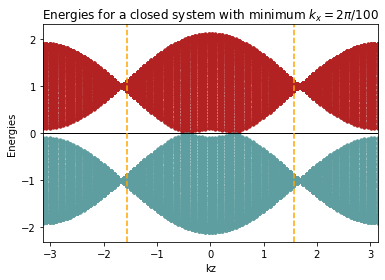

In [115]:
plt.figure()
plt.title("Energies for a closed system with minimum $k_x = 2\pi / 100$")
plt.axhline(y=0,ls='-',c='k',lw=1)
plt.axvline(x=np.arccos(0),ls='--',c='orange')
plt.axvline(x=-np.arccos(0),ls='--',c='orange')
plt.scatter(kzs_summed_chern[Es_summed_chern>0],Es_summed_chern[Es_summed_chern>0],marker='.',c='firebrick')
plt.scatter(kzs_summed_chern[Es_summed_chern<=0],Es_summed_chern[Es_summed_chern<=0],marker='.',c='cadetblue')
plt.xlabel("kz")
plt.ylabel("Energies")
plt.xlim((-np.pi,np.pi))
plt.show()

Take $k_z$ slice and plot wrt $k_x$:

In [133]:
kxs_chern_summed, Es_chern_summed = wt.BulkSpectrumSummedOverKx(100,0,1,1,1,-1.1)

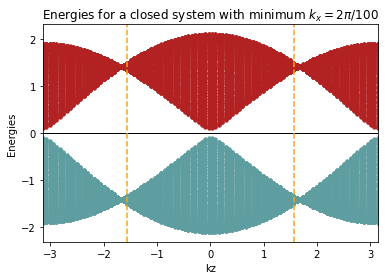

In [134]:
plt.figure()
plt.title("Energies for a closed system with minimum $k_x = 2\pi / 100$")
plt.axhline(y=0,ls='-',c='k',lw=1)
plt.scatter(kxs_chern_summed[Es_chern_summed>0],Es_chern_summed[Es_chern_summed>0],marker='.',c='firebrick')
plt.scatter(kxs_chern_summed[Es_chern_summed<=0],Es_chern_summed[Es_chern_summed<=0],marker='.',c='cadetblue')
plt.xlabel("kx")
plt.ylabel("Energies")
plt.xlim((-np.pi,np.pi))
plt.show()

### Topology

## Finite $L_x$
Periodic in ($y$, $z$) $\rightarrow$ ($k_y$, $k_z$), but open in $x$ with $\dim{x}$=$L_x$. First, in the topological, WSM phase $-1<\gamma<1$

In [106]:
ks_fx, Es_fx, Waves_fx, Loc_fx = wt.FiniteXSpectrum(size=100,Phi=0,res=100,ky=0,tx=1,ty=1,tz=1,g=0)

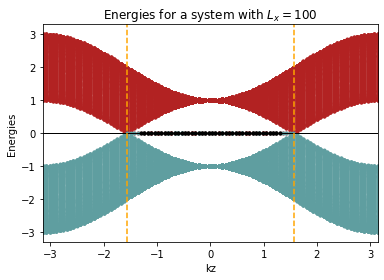

In [107]:
plt.figure()
plt.title("Energies for a system with $L_x = 100$")
plt.axhline(y=0,ls='-',c='k',lw=1)
plt.axvline(x=np.arccos(0),ls='--',c='orange')
plt.axvline(x=-np.arccos(0),ls='--',c='orange')
plt.scatter(ks_fx[Es_fx>0],Es_fx[Es_fx>0],marker='.',c='firebrick')
plt.scatter(ks_fx[Es_fx<=0],Es_fx[Es_fx<=0],marker='.',c='cadetblue')
plt.scatter(ks_fx[Loc_fx],Es_fx[Loc_fx],marker='.',c='k')
plt.xlabel("kz")
plt.ylabel("Energies")
plt.xlim((-np.pi,np.pi))
plt.show()

In [110]:
ks_fx_y, Es_fx_y, Waves_fx_y, Loc_fx_y = wt.FiniteXSpectrumKy(size=100,Phi=0,res=100,kz=1,tx=1,ty=1,tz=1,g=0)

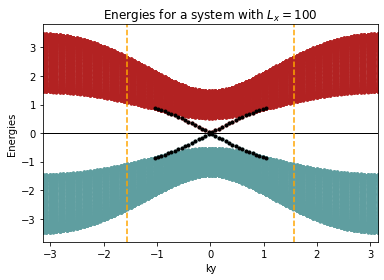

In [111]:
plt.figure()
plt.title("Energies for a system with $L_x = 100$")
plt.axhline(y=0,ls='-',c='k',lw=1)
plt.axvline(x=np.arccos(0),ls='--',c='orange')
plt.axvline(x=-np.arccos(0),ls='--',c='orange')
plt.scatter(ks_fx_y[Es_fx_y>0],Es_fx_y[Es_fx_y>0],marker='.',c='firebrick')
plt.scatter(ks_fx_y[Es_fx_y<=0],Es_fx_y[Es_fx_y<=0],marker='.',c='cadetblue')
plt.scatter(ks_fx_y[Loc_fx_y],Es_fx_y[Loc_fx_y],marker='.',c='k')
plt.xlabel("ky")
plt.ylabel("Energies")
plt.xlim((-np.pi,np.pi))
plt.show()

In [105]:
ks_fx_y_sum, Es_fx_y_sum = wt.BulkSpectrumSummedOverKy(res=100,kz=0,tx=1,ty=1,tz=1,g=0)

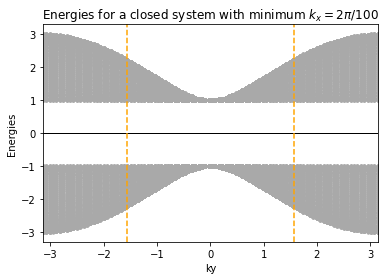

In [107]:
plt.figure()
plt.title("Energies for a closed system with minimum $k_x = 2\pi / 100$")
plt.axhline(y=0,ls='-',c='k',lw=1)
plt.axvline(x=np.arccos(0),ls='--',c='orange')
plt.axvline(x=-np.arccos(0),ls='--',c='orange')
plt.scatter(ks_fx_y_sum,Es_fx_y_sum,marker='.',c='darkgrey')
# plt.scatter(kzs_summed[Es_summed>0],Es_summed[Es_summed>0],marker='.',c='firebrick')
# plt.scatter(kzs_summed[Es_summed<=0],Es_summed[Es_summed<=0],marker='.',c='cadetblue')
plt.xlabel("ky")
plt.ylabel("Energies")
plt.xlim((-np.pi,np.pi))
plt.show()

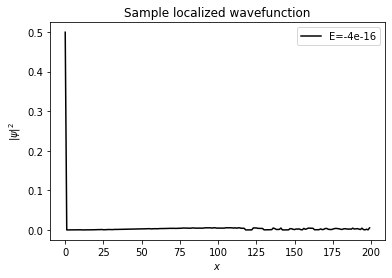

In [149]:
edges = np.where(Loc_fx == True)[0]
plt.figure()
plt.title("Sample localized wavefunction")
plt.plot(np.arange(200), np.abs(Waves_fx[edges[49],:])**2, c='k',
         label="E={:.1}".format(Es_fx[edges[49]]))
plt.ylabel("$|\psi|^2$")
plt.xlabel("$x$")
plt.legend()
plt.show()

Now in the ordinary insulator phase ($\gamma > 1$)

In [7]:
ks_fx_, Es_fx_, Waves_fx_, Loc_fx_ = wt.FiniteXSpectrum(size=100,Phi=0,res=100,ky=0,tx=1,ty=1,tz=1,g=1.5)


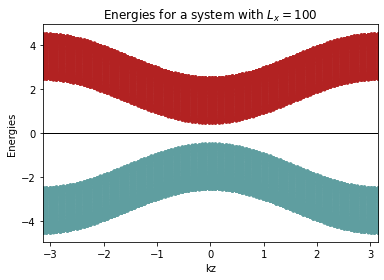

In [8]:
plt.figure()
plt.title("Energies for a system with $L_x = 100$")
plt.axhline(y=0,ls='-',c='k',lw=1)
plt.axvline(x=np.arccos(1.5),ls='--',c='orange')
plt.axvline(x=-np.arccos(1.5),ls='--',c='orange')
plt.scatter(ks_fx_[Es_fx_>0],Es_fx_[Es_fx_>0],marker='.',c='firebrick')
plt.scatter(ks_fx_[Es_fx_<=0],Es_fx_[Es_fx_<=0],marker='.',c='cadetblue')
plt.scatter(ks_fx_[Loc_fx_],Es_fx_[Loc_fx_],marker='.',c='k')
plt.xlabel("kz")
plt.ylabel("Energies")
plt.xlim((-np.pi,np.pi))
plt.show()

"Chern" insulator phase ($\gamma < -1$)

In [111]:
gchern=-1.1

In [112]:
ks_fx__, Es_fx__, Waves_fx__, Loc_fx__ = wt.FiniteXSpectrum(size=100,Phi=0,res=100,ky=0,tx=1,ty=1,tz=1,g=gchern)

In [113]:
ks__,es__=wt.BulkSpectrum(100,0,0,1,1,1,gchern)

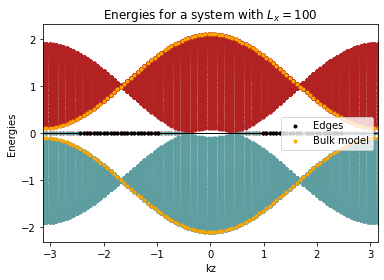

In [114]:
plt.figure()
plt.title("Energies for a system with $L_x = 100$")
plt.axhline(y=0,ls='-',c='k',lw=1)
plt.axvline(x=np.arccos(gchern),ls='--',c='orange')
plt.axvline(x=-np.arccos(gchern),ls='--',c='orange')
plt.scatter(ks_fx__[Es_fx__>0],Es_fx__[Es_fx__>0],marker='.',c='firebrick')
plt.scatter(ks_fx__[Es_fx__<=0],Es_fx__[Es_fx__<=0],marker='.',c='cadetblue')
plt.scatter(ks_fx__[Loc_fx__],Es_fx__[Loc_fx__],marker='.',c='k',label="Edges")

plt.scatter(ks__,es__,marker='.',c='orange',label="Bulk model")

plt.xlabel("kz")
plt.ylabel("Energies")
plt.xlim((-np.pi,np.pi))
plt.legend()
plt.show()

The spectrum matches up to its respective Bulk phase, minus the edge states. Look at $E=0$ states to see if they are indeed localized to the edge:

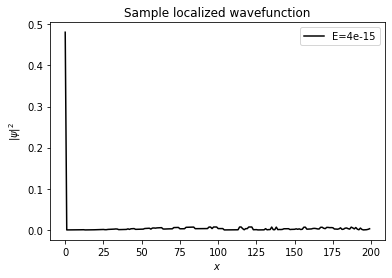

In [31]:
edges = np.where(Loc_fx__ == True)[0]
plt.figure()
plt.title("Sample localized wavefunction")
plt.plot(np.arange(200), np.abs(Waves_fx__[edges[37],:])**2, c='k',
         label="E={:.1}".format(Es_fx__[edges[37]]))
plt.ylabel("$|\psi|^2$")
plt.xlabel("$x$")
plt.legend()
plt.show()

### Bulk-boundary correspondence
Use bulk characteristics (nonzero Chern number) to predict the existence of edge states. Note Cn is only defined for 2D systems. So we will have a kz-dependent Chern number.
We can sketch a 2D phase diagram, $\gamma$ vs. kz 

##### Test

In [44]:
CNs = wb.PhaseDiagram(20)

In [59]:
kzs = np.linspace(-np.pi,np.pi,num=100)

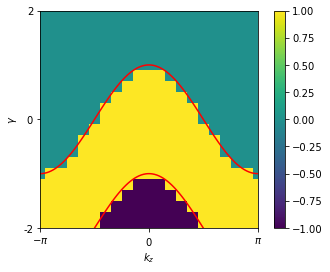

In [69]:
plt.figure()
plt.imshow(CNs)
plt.plot(10/np.pi*kzs+10,5*np.cos(kzs)+10,c="r")
plt.plot(10/np.pi*kzs+10,5*(np.cos(kzs)-2)+10,c="r")
plt.ylim(0,20)
plt.xlim(0,20)
plt.xlabel("$k_z$")
plt.ylabel("$\gamma$")
plt.yticks(ticks=[0,10,20],labels=["-2","0","2"])
plt.xticks(ticks=[0,10,20],labels=["$-\pi$","$0$","$\pi$"])
plt.colorbar()
plt.show()

##### True

In [71]:
res = 100
CNs_100 = np.zeros((res,res),dtype=int)
for i in range(res):
    Chern_g = np.loadtxt("data/weyl_phasediagram_g_{}".format(i), delimiter = ",")
    CNs_100[i,:] = Chern_g

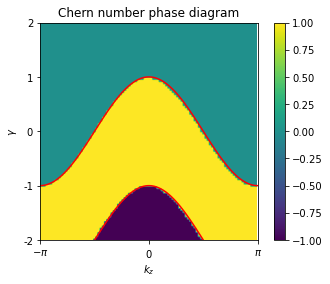

In [82]:
plt.figure()
plt.title("Chern number phase diagram")
plt.imshow(CNs_100)
plt.plot(50/np.pi*kzs+50,25*np.cos(kzs)+50,c="r")
plt.plot(50/np.pi*kzs+50,25*(np.cos(kzs)-2)+50,c="r")
plt.ylim(0,100)
plt.xlim(0,100)
plt.xlabel("$k_z$")
plt.ylabel("$\gamma$")
plt.yticks(ticks=[0,25,50,75,100],labels=["-2","-1","0","1","2"])
plt.xticks(ticks=[0,50,100],labels=["$-\pi$","$0$","$\pi$"])
plt.colorbar()
plt.show()

In [93]:
res = 100
CNs_100 = np.zeros((res,res),dtype=int)
for i in range(res):
    Chern_g = np.loadtxt("data_mod/weyl_phasediagram_mod_g_{}".format(i), delimiter = ",")
    CNs_100[i,:] = Chern_g

In [106]:
def CoordMap(x):
    return 12.5*x+75

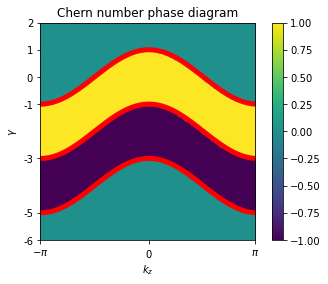

In [110]:
plt.figure()
plt.title("Chern number phase diagram")
plt.imshow(CNs_100)
plt.plot(50/np.pi*kzs+50,12.5*np.cos(kzs)+75,c="r",lw=5)
plt.plot(50/np.pi*kzs+50,12.5*(np.cos(kzs)-2)+75,c="r",lw=5)
plt.plot(50/np.pi*kzs+50,12.5*(np.cos(kzs)-4)+75,c="r",lw=5)
plt.ylim(0,99)
plt.xlim(0,99)
plt.xlabel("$k_z$")
plt.ylabel("$\gamma$")
plt.yticks(ticks=[0,CoordMap(-5),CoordMap(-3),62.5,75,87.5,100],
labels=["-6","-5","-3","-1","0","1","2"])
plt.xticks(ticks=[0,50,99],labels=["$-\pi$","$0$","$\pi$"])
plt.colorbar()
plt.show()

### Introduce a magnetic field $B$
Let $A = Bx \hat{y}$. See notes for a magnetic theory derivation.

In [213]:
ks_fx_B, Es_fx_B, Waves_fx_B, Loc_fx_B = wt.FiniteXSpectrum(size=100,Phi=1/50,res=100,ky=0,tx=1,ty=1,tz=1,g=0)


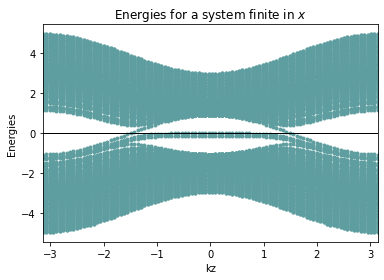

In [215]:
plt.figure()
plt.title("Energies for a system finite in $x$")
plt.axhline(y=0,ls='-',c='k',lw=1)
# plt.axvline(x=np.arccos(0),ls='--',c='orange')
# plt.axvline(x=-np.arccos(0),ls='--',c='orange')
plt.scatter(ks_fx_B,Es_fx_B,marker='.',c='cadetblue')
plt.xlabel("kz")
plt.ylabel("Energies")
plt.xlim((-np.pi,np.pi))
plt.show()

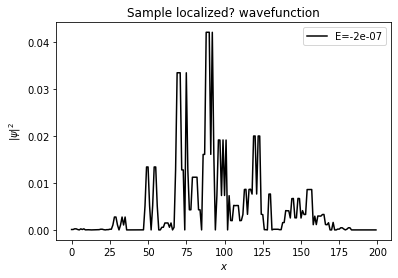

In [208]:
plt.figure()
plt.title("Sample localized? wavefunction")
plt.plot(np.arange(200), np.abs(Waves_fx_B[9836])**2, c='k',
         label="E={:.1}".format(Es_fx_B[9836]))
plt.ylabel("$|\psi|^2$")
plt.xlabel("$x$")
plt.legend()
plt.show()

## Green function numerics
Following Marchand & Franz and Borchmann & Pereg-Barnea.

### Full spectral function

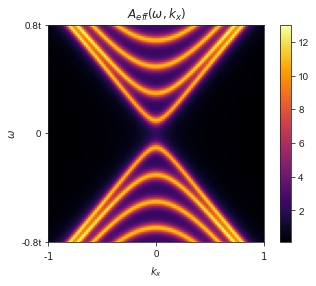

In [383]:
size = 30
res=100

As = np.zeros((res,res),dtype=float)

for i in range(res):
    kx = np.linspace(-1,1,res)[i]
    As[:,i] = wg.FullSpectralFunctionWeylWK(size=size,res=res,kx=kx,kz=-np.pi/2,t=1,g=0,mu=-2,m=0.5,r=0)

plt.figure()
plt.title(r"$A_{eff}(\omega, k_x)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,res)
plt.xlim(0,res-1)
plt.yticks([0,int(res/2),res],labels=["-0.8t","0","0.8t"])
plt.xticks([0,int(res/2)-1/2,res-1],labels=[r"-$1$",r"0",r"$1$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$\omega$")
# plt.scatter(49.5,49.5)
plt.colorbar()
plt.show()

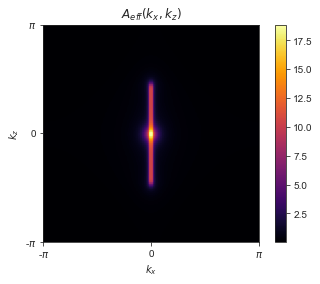

In [384]:
size = 30
res=100

As = np.zeros((res,res),dtype=float)

for i in range(res):
    kx = np.linspace(-np.pi,np.pi,res)[i]
    As[:,i] = wg.FullSpectralFunctionWeylKK(size=size,res=res,kx=kx,w=0,t=1,g=0,mu=-2,m=0.5,r=0)

plt.figure()
plt.title(r"$A_{eff}(k_x,k_z)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,res)
plt.xlim(0,res-1)
plt.yticks([0,int(res/2),res],labels=["-$\pi$","0","$\pi$"])
plt.xticks([0,int(res/2)-1/2,res-1],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$k_z$")
# plt.scatter(49.5,49.5)
plt.colorbar()
plt.show()

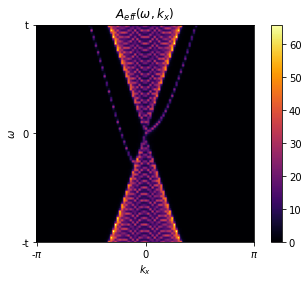

In [140]:
res = 100
As = np.zeros((res,res),dtype=int)
for i in range(res):
    A = np.loadtxt(base_path+"/data_full_spectral/spectral_function_WK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(\omega, k_x)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=["-t","0","t"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$\omega$")
plt.colorbar()
plt.show()

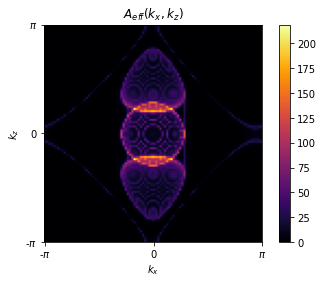

In [139]:
res = 100
As = np.zeros((res,res),dtype=int)
for i in range(res):
    A = np.loadtxt(base_path+"/data_full_spectral/spectral_function_KK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(k_x,k_z)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$k_z$")
plt.colorbar()
plt.show()

### Spectral function numerics

#### Single node model.

$r=0.5$

a) Integrate over WSM

b) Integrate over WSM

c) Integrate over metal

d) Integrate over metal


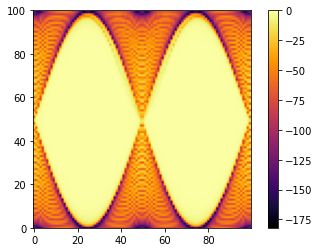

In [125]:
res = 100
As = np.zeros((res,res),dtype=int)
for i in range(res):
    A = np.loadtxt("data_spectral/spectral_function_Weyl_WK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.colorbar()
    

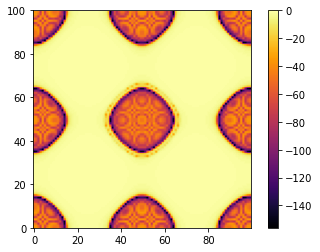

In [126]:
res = 100
As = np.zeros((res,res),dtype=int)
for i in range(res):
    A = np.loadtxt("data_spectral/spectral_function_Weyl_KK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.colorbar()

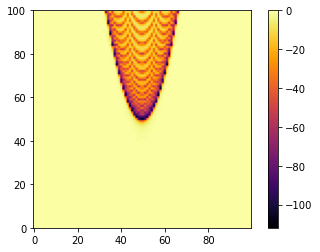

In [127]:
res = 100
As = np.zeros((res,res),dtype=int)
for i in range(res):
    A = np.loadtxt("data_spectral/spectral_function_Metal_WK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.colorbar()

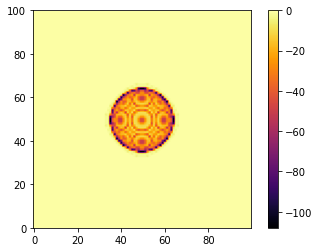

In [128]:
res = 100
As = np.zeros((res,res),dtype=int)
for i in range(res):
    A = np.loadtxt("data_spectral/spectral_function_Metal_KK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.colorbar()

#### No tunneling

These results aren't particularly interesting. Take a more accurate model for the WSM which accounts for two nodes -- the minimal model we previously discussed. Keep everything else (Green function, Metal, boundary conditions) the same.

Surface cuts at $\omega=0.8 + i \epsilon$ and $k_z = -\pi/2$.

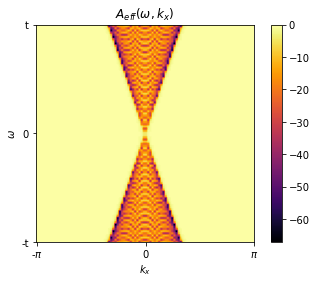

In [183]:
res = 100
As_weyl = np.zeros((res,res),dtype=int)
for i in range(res):
    A = np.loadtxt("data_notunn/spectral_function_Weyl_WK_{}.csv".format(i), delimiter = ",")
    As_weyl[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(\omega, k_x)$")
plt.imshow(As_weyl,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=["-t","0","t"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$\omega$")
plt.colorbar()
plt.show()

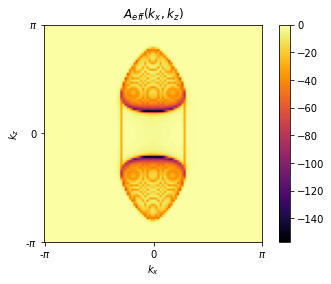

In [182]:
res = 100
As = np.zeros((res,res),dtype=int)
for i in range(res):
    A = np.loadtxt("data_notunn/spectral_function_Weyl_KK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(k_x,k_z)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.yticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$k_z$")
plt.colorbar()
plt.show()

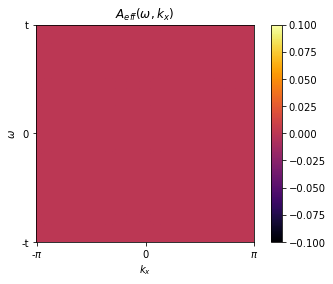

In [181]:
res = 100
As = np.zeros((res,res),dtype=int)
for i in range(res):
    A = np.loadtxt("data_notunn/spectral_function_Metal_WK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(\omega, k_x)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=["-t","0","t"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$\omega$")
plt.colorbar()
plt.show()

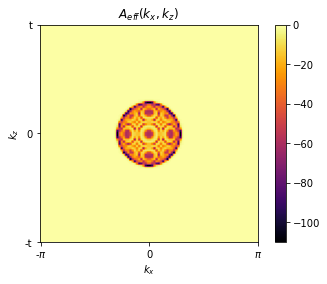

In [289]:
res = 100
As = np.zeros((res,res),dtype=int)
for i in range(res):
    A = np.loadtxt("data_notunn/spectral_function_Metal_KK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(k_x,k_z)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=["-t","0","t"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$k_z$")
plt.colorbar()
plt.show()

#### Tunneling
$r=2.3$

Surface cuts at $\omega=0.8 + i \epsilon$ and $k_z = -\pi/2$.

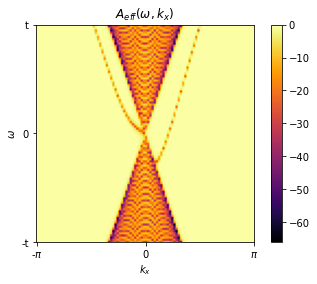

In [224]:
res = 100
As = np.zeros((res,res),dtype=int)
for i in range(res):
    A = np.loadtxt("data_fixtunn/spectral_function_Weyl_WK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(\omega, k_x)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=["-t","0","t"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$\omega$")
plt.colorbar()
plt.show()

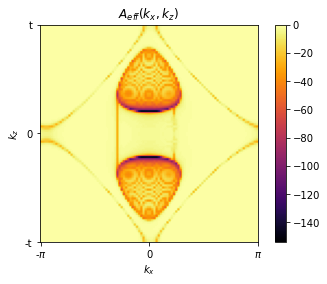

In [220]:
res = 100
As = np.zeros((res,res),dtype=int)
for i in range(res):
    A = np.loadtxt("data_fixtunn/spectral_function_Weyl_KK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(k_x,k_z)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=["-t","0","t"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$k_z$")
plt.colorbar()
plt.show()

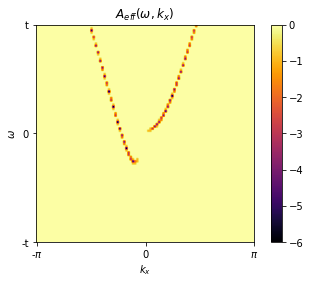

In [187]:
res = 100
As = np.zeros((res,res),dtype=int)
for i in range(res):
    A = np.loadtxt("data_fixtunn/spectral_function_Metal_WK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(\omega, k_x)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=["-t","0","t"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$\omega$")
plt.colorbar()
plt.show()

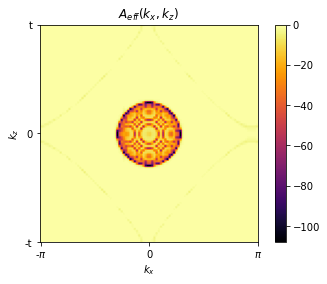

In [217]:
res = 100
As = np.zeros((res,res),dtype=int)
for i in range(res):
    A = np.loadtxt("data_fixtunn/spectral_function_Metal_KK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(k_x,k_z)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=["-t","0","t"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$k_z$")
plt.colorbar()
plt.show()

$r=2.3$

Surface cuts at $\omega=0.8 + i \epsilon$ and $k_z = \pi/2$.

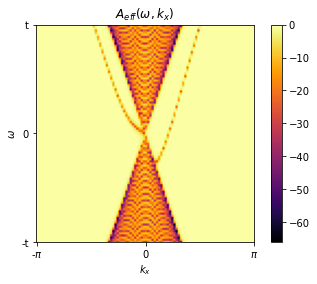

In [233]:
res = 100
As = np.zeros((res,res),dtype=int)
for i in range(res):
    A = np.loadtxt("data_kx_2/spectral_function_Weyl_WK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(\omega, k_x)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=["-t","0","t"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$\omega$")
plt.colorbar()
plt.show()

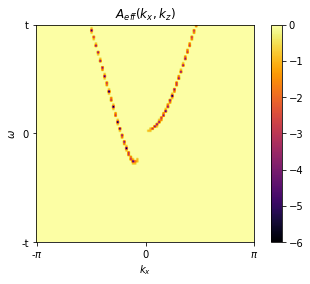

In [280]:
res = 100
As = np.zeros((res,res),dtype=int)
for i in range(res):
    A = np.loadtxt("data_kx_2/spectral_function_Metal_WK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(k_x,k_z)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=["-t","0","t"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$\omega$")
plt.colorbar()
plt.show()

$r=2.3$

Surface cuts at $\omega=0.8 + i \epsilon$ and $k_z = 0$.

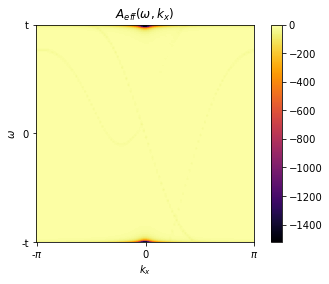

In [278]:
res = 100
As = np.zeros((res,res),dtype=int)
for i in range(res):
    A = np.loadtxt("data_kx_0/spectral_function_Weyl_WK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(\omega, k_x)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=["-t","0","t"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$\omega$")
plt.colorbar()
plt.show()

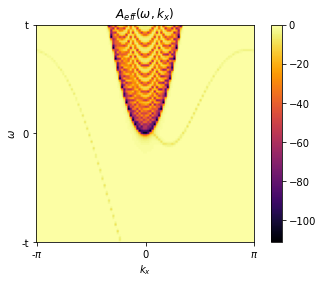

In [281]:
res = 100
As = np.zeros((res,res),dtype=int)
for i in range(res):
    A = np.loadtxt("data_kx_0/spectral_function_Metal_WK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(\omega, k_x)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=["-t","0","t"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$\omega$")
plt.colorbar()
plt.show()

##### Tunnelling before fixing it
I.e. without the y-hopping term that comes from $\cos k_y \sigma_z$

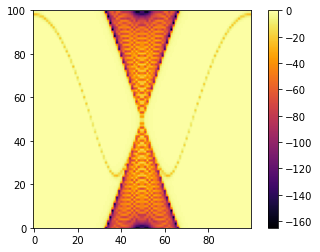

In [112]:
res = 100
As = np.zeros((res,res),dtype=int)
for i in range(res):
    A = np.loadtxt("data_fixtunn/spectral_function_Weyl_WK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.colorbar()

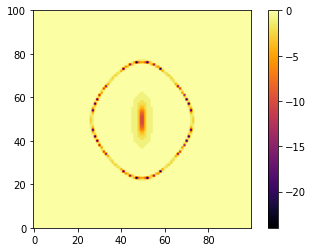

In [113]:
res = 100
As = np.zeros((res,res),dtype=int)
for i in range(res):
    A = np.loadtxt("data_fixtunn/spectral_function_Weyl_KK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.colorbar()

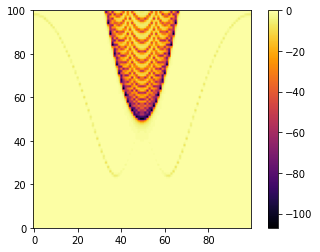

In [114]:
res = 100
As = np.zeros((res,res),dtype=int)
for i in range(res):
    A = np.loadtxt("data_fixtunn/spectral_function_Metal_WK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.colorbar()

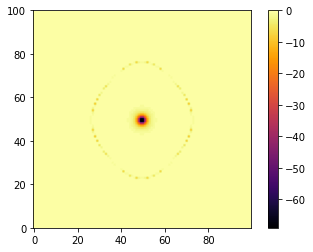

In [115]:
res = 100
As = np.zeros((res,res),dtype=int)
for i in range(res):
    A = np.loadtxt("data_fixtunn/spectral_function_Metal_KK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.colorbar()

#### Plot vs. $k_z$
At $k_x = 0$.

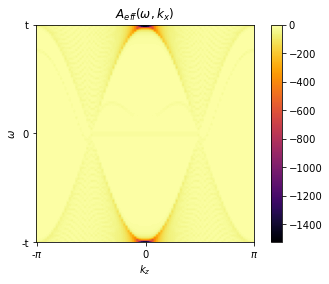

In [212]:
res = 100
As_kz_w = np.zeros((res,res),dtype=int)
for i in range(res):
    A = np.loadtxt("data_kz/spectral_function_Weyl_WK_{}.csv".format(i), delimiter = ",")
    As_kz_w[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(\omega, k_x)$")
plt.imshow(As_kz_w,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=["-t","0","t"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_z$")
plt.ylabel(r"$\omega$")
plt.colorbar()
plt.show()

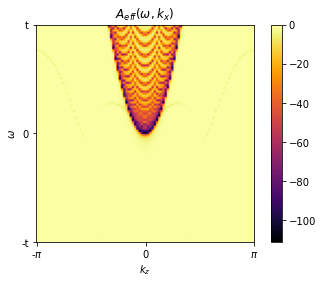

In [213]:
res = 100
As_kz_k = np.zeros((res,res),dtype=int)
for i in range(res):
    A = np.loadtxt("data_kz/spectral_function_Metal_WK_{}.csv".format(i), delimiter = ",")
    As_kz_k[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(\omega, k_x)$")
plt.imshow(As_kz_k,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=["-t","0","t"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_z$")
plt.ylabel(r"$\omega$")
plt.colorbar()
plt.show()

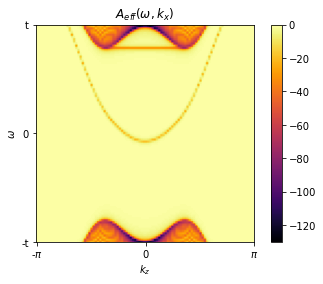

In [214]:
res = 100
As = np.zeros((res,res),dtype=int)
for i in range(res):
    A = np.loadtxt("data_kz/spectral_function_Weyl_WK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(\omega, k_x)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=["-t","0","t"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_z$")
plt.ylabel(r"$\omega$")
plt.colorbar()
plt.show()

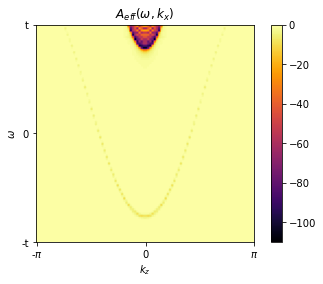

In [285]:
res = 100
As = np.zeros((res,res),dtype=int)
for i in range(res):
    A = np.loadtxt("data_kz/spectral_function_Metal_WK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(\omega, k_x)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=["-t","0","t"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_z$")
plt.ylabel(r"$\omega$")
plt.colorbar()
plt.show()

#### Sum over $k_z$
$r=2.3$

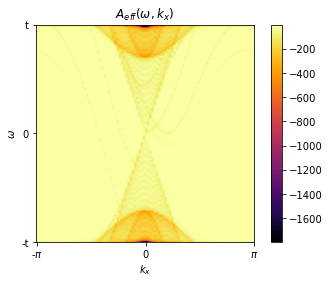

In [191]:
res = 100
As = np.zeros((res,res),dtype=float)
for i in range(res):
    A = np.loadtxt(base_path+"/data_sum_kz/spectral_function_Weyl_WK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(\omega, k_x)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=["-t","0","t"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$\omega$")
plt.colorbar()
plt.show()

### Surface spectral function

#### No tunnelling
Surface cuts at $\omega = 0 + i\epsilon$ and $k_z=0$.

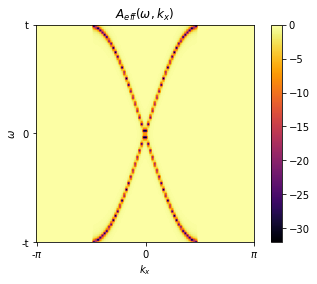

In [189]:
res = 100
As = np.zeros((res,res),dtype=float)
for i in range(res):
    A = np.loadtxt(base_path+"/data_surface_notunn/spectral_function_Weyl_WK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(\omega, k_x)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=["-t","0","t"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$\omega$")
plt.colorbar()
plt.show()

Note the bit of curvature near the ends of the bands. We see this in the spectrum as well.

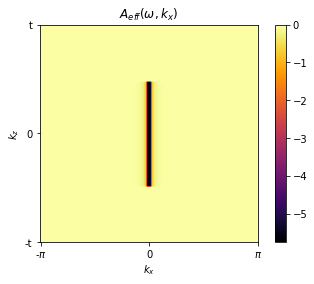

In [190]:
res = 100
As = np.zeros((res,res),dtype=float)
for i in range(res):
    A = np.loadtxt(base_path+"/data_surface_notunn/spectral_function_Weyl_KK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(\omega, k_x)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=["-t","0","t"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$k_z$")
plt.colorbar()
plt.show()

We are in the WSM regime, we expect to get a Fermi arc-like Fermi surface. We do!

#### Tunnelling
$r=0.5$
Surface cuts at $\omega = 0.8 + i\epsilon$ and $k_z=0$.

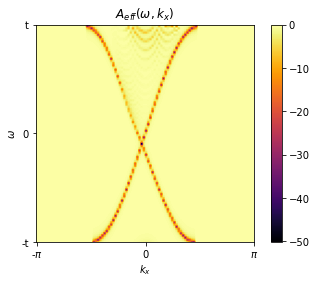

In [176]:
res = 100
As = np.zeros((res,res),dtype=float)
for i in range(res):
    A = np.loadtxt(base_path+"/data_surface_tunn/spectral_function_Weyl_WK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(\omega, k_x)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=["-t","0","t"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$\omega$")
plt.colorbar()
plt.show()

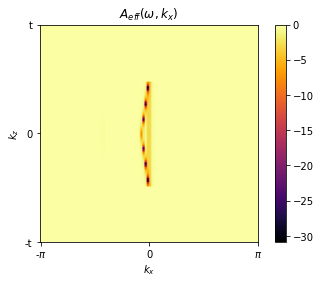

In [177]:
res = 100
As = np.zeros((res,res),dtype=float)
for i in range(res):
    A = np.loadtxt(base_path+"/data_surface_tunn/spectral_function_Weyl_KK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(\omega, k_x)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=["-t","0","t"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$k_z$")
plt.colorbar()
plt.show()

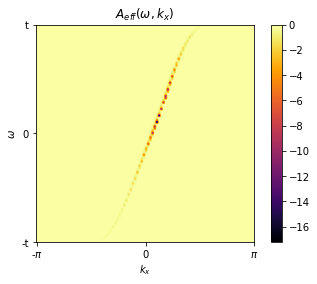

In [178]:
res = 100
As = np.zeros((res,res),dtype=float)
for i in range(res):
    A = np.loadtxt(base_path+"/data_surface_tunn/spectral_function_Metal_WK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(\omega, k_x)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=["-t","0","t"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$\omega$")
plt.colorbar()
plt.show()

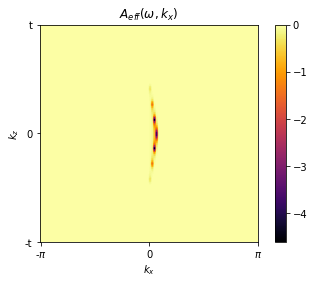

In [179]:
res = 100
As = np.zeros((res,res),dtype=float)
for i in range(res):
    A = np.loadtxt(base_path+"/data_surface_tunn/spectral_function_Metal_KK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(\omega, k_x)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=["-t","0","t"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$k_z$")
plt.colorbar()
plt.show()

#### Surfaces vs. $k_z$
$r=0.5$, $k_x=0$, $\omega=0.5+i\epsilon$

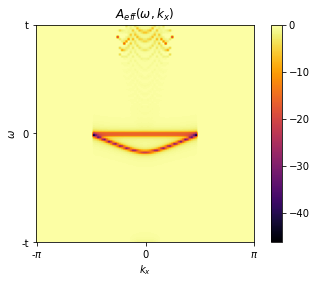

In [175]:
res = 100
As = np.zeros((res,res),dtype=float)
for i in range(res):
    A = np.loadtxt(base_path+"/data_surface_kz/spectral_function_Weyl_WK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(\omega, k_x)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=["-t","0","t"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$\omega$")
plt.colorbar()
plt.show()

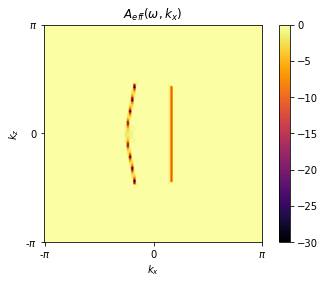

In [44]:
res = 100
As = np.zeros((res,res),dtype=int)
for i in range(res):
    A = np.loadtxt(base_path+"/data_surface_kz/spectral_function_Weyl_KK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(\omega, k_x)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$k_z$")
plt.colorbar()
plt.show()

#### Left side only
$r=0.5$, $\omega = 0 + i\epsilon$, $k_z = 0$.

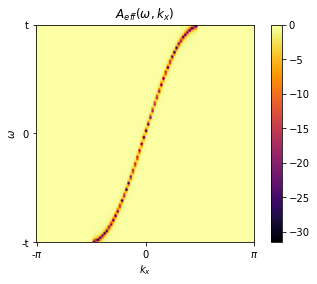

In [174]:
res = 100
As = np.zeros((res,res),dtype=float)
for i in range(res):
    A = np.loadtxt(base_path+"/data_surface_left/spectral_function_Weyl_Left_WK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(\omega, k_x)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=["-t","0","t"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$\omega$")
plt.colorbar()
plt.show()

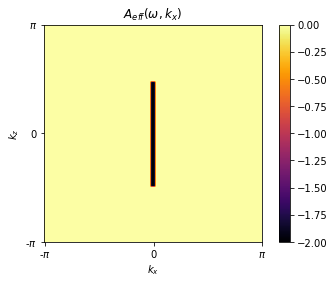

In [26]:
res = 100
As = np.zeros((res,res),dtype=int)
for i in range(res):
    A = np.loadtxt(base_path+"/data_surface_left/spectral_function_Weyl_Left_KK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(\omega, k_x)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$k_z$")
plt.colorbar()
plt.show()

#### Right side only
$r=0.5$, $\omega = 0 + i\epsilon$, $k_z = 0$.

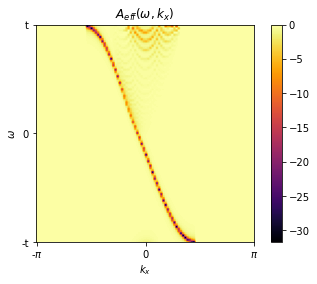

In [173]:
res = 100
As = np.zeros((res,res),dtype=float)
for i in range(res):
    A = np.loadtxt(base_path+"/data_surface_right/spectral_function_Weyl_Right_WK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(\omega, k_x)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=["-t","0","t"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$\omega$")
plt.colorbar()
plt.show()

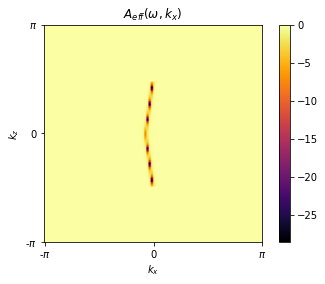

In [192]:
res = 100
As = np.zeros((res,res),dtype=float)
for i in range(res):
    A = np.loadtxt(base_path+"/data_surface_right/spectral_function_Weyl_Right_KK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(\omega, k_x)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$k_z$")
plt.colorbar()
plt.show()

#### Sum over $k_z$
$r=2.3$

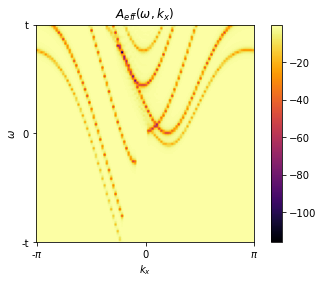

In [193]:
res = 100
As = np.zeros((res,res),dtype=float)
for i in range(res):
    A = np.loadtxt(base_path+"/data_surface_sum_kz/spectral_function_Weyl_WK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(\omega, k_x)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=["-t","0","t"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$\omega$")
plt.colorbar()
plt.show()

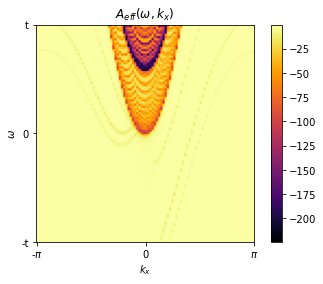

In [195]:
res = 100
As = np.zeros((res,res),dtype=float)
for i in range(res):
    A = np.loadtxt(base_path+"/data_sum_kz/spectral_function_Metal_WK_{}.csv".format(i), delimiter = ",")
    As[:,i] = A

plt.figure()
plt.title(r"$A_{eff}(\omega, k_x)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=["-t","0","t"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$\omega$")
plt.colorbar()
plt.show()

### Self-energy numerics

Look for $k_x$ dependence, asymmetry in spectrum.

$r=2.3$, $k_z=-\pi/2$.

In [181]:
SE = np.loadtxt(base_path+"/data_selfenergy/self_energy_Weyl_WK_{}.csv".format(i), delimiter = ",", dtype=complex)

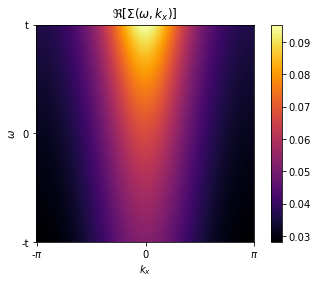

In [187]:
res = 100
SEs = np.zeros((res,res),dtype=complex)
for i in range(res):
    SE = np.loadtxt(base_path+"/data_selfenergy/self_energy_Weyl_WK_{}.csv".format(i), delimiter = ",", dtype=complex)
    SEs[:,i] = SE

plt.figure()
plt.title(r"$\Re[\Sigma(\omega, k_x)]$")
plt.imshow(np.real(SEs),cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=["-t","0","t"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$\omega$")
plt.colorbar()
plt.show()

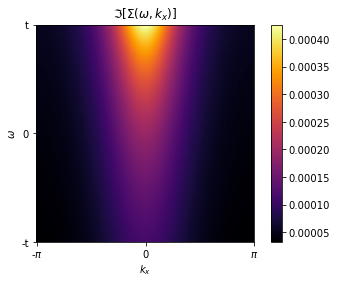

In [186]:
res = 100
SEs = np.zeros((res,res),dtype=complex)
for i in range(res):
    SE = np.loadtxt(base_path+"/data_selfenergy/self_energy_Weyl_WK_{}.csv".format(i), delimiter = ",", dtype=complex)
    SEs[:,i] = SE

plt.figure()
plt.title(r"$\Im [\Sigma(\omega, k_x)]$")
plt.imshow(np.imag(SEs),cmap="inferno")
plt.ylim(0,100)
plt.yticks([0,50,100],labels=["-t","0","t"])
plt.xticks([0,50,100],labels=[r"-$\pi$",r"0",r"$\pi$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$\omega$")
plt.colorbar()
plt.show()

Symmetric about $k_x$, as expected. However, the procedure is slightly incorrect as it does not diagonalize the Weyl hamiltonian simultaneously (see notes about this). 

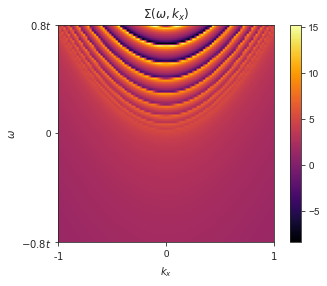

In [438]:
size = 30
res=100

SE = np.zeros((res,res),dtype=float)

for i in range(res):
    kx = np.linspace(-1,1,res)[i]
    SE[:,i] = wse.SelfEnergyWeylWK(size=size,res=res,kx=kx,kz=-np.pi/2,t=1,g=0,mu=0,m=0.5,r=2.3)

plt.figure()
plt.title(r"$\Sigma(\omega, k_x)$")
plt.imshow(SE,cmap="inferno")
plt.ylim(0,res)
plt.xlim(0,res-1)
plt.yticks([0,int(res/2),res],labels=["$-0.8t$","0","$0.8t$"])
plt.xticks([0,int(res/2)-1/2,res-1],labels=[r"-$1$",r"0",r"$1$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$\omega$")
# plt.scatter(49.5,49.5)
plt.colorbar()
plt.show()

### Effective spectral function

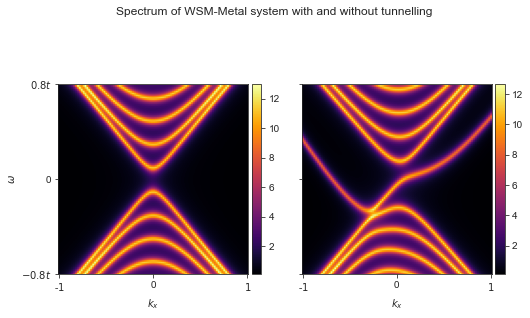

In [391]:
size=30
res=100

As_0 = np.zeros((res,res),dtype=float)
As_23 = np.zeros((res,res),dtype=float)
kxs = np.linspace(-1,1,res)

for i in range(res):
    kx = kxs[i]
    As_0[:,i] = wg.SpectralFunctionWeylWK(size=size,res=res,kx=kx,kz=-np.pi/2,t=1,g=0,mu=-2,m=0.5,r=0,spin=0)
    As_23[:,i] = wg.SpectralFunctionWeylWK(size=size,res=res,kx=kx,kz=-np.pi/2,t=1,g=0,mu=-2,m=0.5,r=2.3,spin=0)

fig,ax=plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(8,5))

plt.suptitle("Spectrum of WSM-Metal system with and without tunnelling")

im0 = ax[0].imshow(As_0,cmap='inferno')
ax[0].set_ylim(0,res)
ax[0].set_yticks([0,int(res/2),res])
ax[0].set_yticklabels(["$-0.8t$","0","$0.8t$"])
ax[0].set_xticks([0,int(res/2)-1/2,res-1])
ax[0].set_xticklabels([r"-$1$",r"0",r"$1$"])
ax[0].set_xlabel(r"$k_x$")
ax[0].set_ylabel(r"$\omega$")

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

im1 = ax[1].imshow(As_23,cmap='inferno')
ax[1].set_xlabel(r"$k_x$")
ax[1].set_xticks([0,int(res/2)-1/2,res-1])
ax[1].set_xticklabels([r"-$1$",r"0",r"$1$"])

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

plt.show()

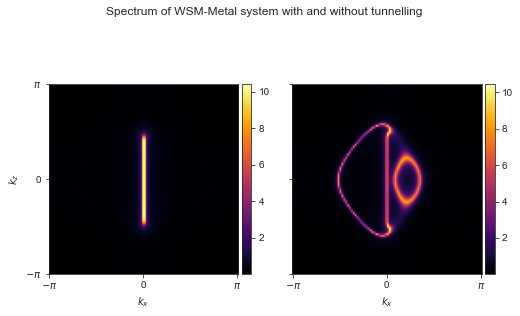

In [390]:
size=30
res=100

As_0 = np.zeros((res,res),dtype=float)
As_23 = np.zeros((res,res),dtype=float)
kxs = np.linspace(-np.pi,np.pi,res)

for i in range(res):
    kx = kxs[i]
    As_0[:,i] = wg.SpectralFunctionWeylKK(size=size,res=res,kx=kx,w=0,t=1,g=0,mu=-2,m=0.5,r=0,spin=0)
    As_23[:,i] = wg.SpectralFunctionWeylKK(size=size,res=res,kx=kx,w=0,t=1,g=0,mu=-2,m=0.5,r=2.3,spin=0)

fig,ax=plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(8,5))

plt.suptitle("Spectrum of WSM-Metal system with and without tunnelling")

im0 = ax[0].imshow(As_0,cmap='inferno')
ax[0].set_ylim(0,res)
ax[0].set_yticks([0,int(res/2),res])
ax[0].set_yticklabels(["$-\pi$","0","$\pi$"])
ax[0].set_xticks([0,int(res/2)-1/2,res-1])
ax[0].set_xticklabels(["$-\pi$","0","$\pi$"])
ax[0].set_xlabel(r"$k_x$")
ax[0].set_ylabel(r"$k_z$")

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

im1 = ax[1].imshow(As_23,cmap='inferno')
ax[1].set_xlabel(r"$k_x$")
ax[1].set_xticks([0,int(res/2)-1/2,res-1])
ax[1].set_xticklabels(["$-\pi$","0","$\pi$"])

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

plt.show()

### Surface spectral function 

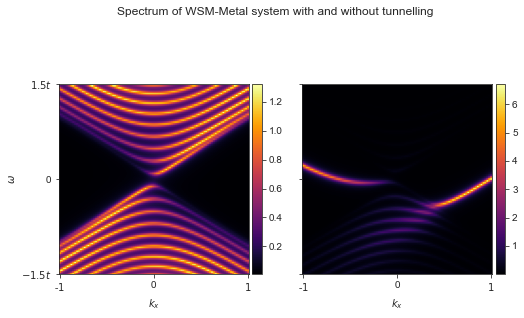

In [900]:
size=30
res=100

As_0 = np.zeros((res,res),dtype=float)
As_23 = np.zeros((res,res),dtype=float)
kxs = np.linspace(-1,1,res)

for i in range(res):
    kx = kxs[i]
    As_0[:,i] = wg.SurfaceSpectralFunctionWeylWK(size=size,res=res,kx=kx,kz=-np.pi/2,t=1,g=0,mu=-4,r=0,spin=0,side=1)
    As_23[:,i] = wg.SurfaceSpectralFunctionWeylWK(size=size,res=res,kx=kx,kz=-np.pi/2,t=1,g=0,mu=-4,r=2.3,spin=0,side=1)

fig,ax=plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(8,5))

plt.suptitle("Spectrum of WSM-Metal system with and without tunnelling")

im0 = ax[0].imshow(As_0,cmap='inferno')
ax[0].set_ylim(0,res)
ax[0].set_yticks([0,int(res/2),res])
ax[0].set_yticklabels(["$-1.5t$","0","$1.5t$"])
ax[0].set_xticks([0,int(res/2)-1/2,res-1])
ax[0].set_xticklabels([r"-$1$",r"0",r"$1$"])
ax[0].set_xlabel(r"$k_x$")
ax[0].set_ylabel(r"$\omega$")

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

im1 = ax[1].imshow(As_23,cmap='inferno')
ax[1].set_xlabel(r"$k_x$")
ax[1].set_xticks([0,int(res/2)-1/2,res-1])
ax[1].set_xticklabels([r"-$1$",r"0",r"$1$"])

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

plt.show()

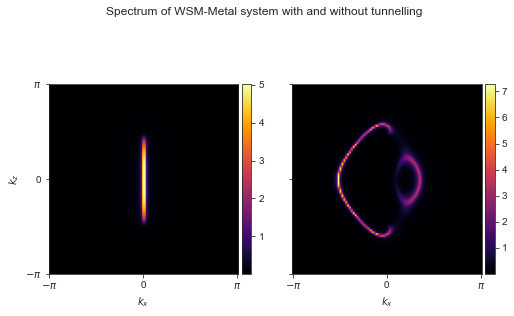

In [401]:
size=30
res=100

As_0 = np.zeros((res,res),dtype=float)
As_23 = np.zeros((res,res),dtype=float)
kxs = np.linspace(-np.pi,np.pi,res)

for i in range(res):
    kx = kxs[i]
    As_0[:,i] = wg.SurfaceSpectralFunctionWeylKK(size=size,res=res,kx=kx,w=0,t=1,g=0,mu=-4,r=0,spin=0,side=1)
    As_23[:,i] = wg.SurfaceSpectralFunctionWeylKK(size=size,res=res,kx=kx,w=0,t=1,g=0,mu=-4,r=2.3,spin=0,side=1)

fig,ax=plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(8,5))

plt.suptitle("Spectrum of WSM-Metal system with and without tunnelling")

im0 = ax[0].imshow(As_0,cmap='inferno')
ax[0].set_ylim(0,res)
ax[0].set_yticks([0,int(res/2),res])
ax[0].set_yticklabels(["$-\pi$","0","$\pi$"])
ax[0].set_xticks([0,int(res/2)-1/2,res-1])
ax[0].set_xticklabels(["$-\pi$","0","$\pi$"])
ax[0].set_xlabel(r"$k_x$")
ax[0].set_ylabel(r"$k_z$")

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

im1 = ax[1].imshow(As_23,cmap='inferno')
ax[1].set_xlabel(r"$k_x$")
ax[1].set_xticks([0,int(res/2)-1/2,res-1])
ax[1].set_xticklabels(["$-\pi$","0","$\pi$"])

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

plt.show()

### Analytic Green function

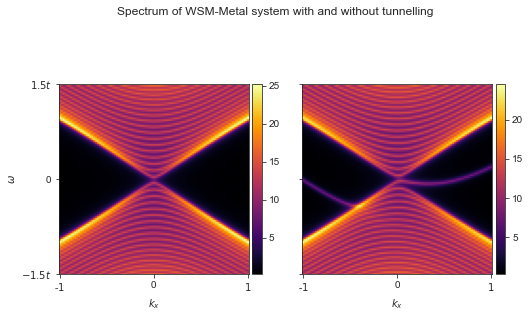

In [902]:
size=30
res=100

As_0 = np.zeros((res,res),dtype=float)
As_23 = np.zeros((res,res),dtype=float)
kxs = np.linspace(-1,1,res)

for i in range(res):
    kx = kxs[i]
    As_0[:,i] = wg.AnalyticSpectralFunctionWeylWK(size=size,res=res,kx=kx,kz=-np.pi/2,t=1,g=0,mu=-4,r=0,side=0)
    As_23[:,i] = wg.AnalyticSpectralFunctionWeylWK(size=size,res=res,kx=kx,kz=-np.pi/2,t=1,g=0,mu=-4,r=2.3,side=0)

fig,ax=plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(8,5))

plt.suptitle("Spectrum of WSM-Metal system with and without tunnelling")

im0 = ax[0].imshow(As_0,cmap='inferno')
ax[0].set_ylim(0,res)
ax[0].set_yticks([0,int(res/2),res])
ax[0].set_yticklabels(["$-1.5t$","0","$1.5t$"])
ax[0].set_xticks([0,int(res/2)-1/2,res-1])
ax[0].set_xticklabels([r"-$1$",r"0",r"$1$"])
ax[0].set_xlabel(r"$k_x$")
ax[0].set_ylabel(r"$\omega$")

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

im1 = ax[1].imshow(As_23,cmap='inferno')
ax[1].set_xlabel(r"$k_x$")
ax[1].set_xticks([0,int(res/2)-1/2,res-1])
ax[1].set_xticklabels([r"-$1$",r"0",r"$1$"])

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

plt.show()

In [844]:
size=20
res=100

As_0 = np.zeros((res,res),dtype=float)
As_08 = np.zeros((res,res),dtype=float)
As_1 = np.zeros((res,res),dtype=float)
As_15 = np.zeros((res,res),dtype=float)
As_23 = np.zeros((res,res),dtype=float)
kxs = np.linspace(-1.5,1.5,res)

for i in range(res):
    kx = kxs[i]
    As_0[:,i] = wg.AnalyticSpectralFunctionWeylWK(size=size,res=res,kx=kx,kz=-np.pi/2,t=1,g=0,mu=-4,r=0,side=1)
    As_08[:,i] = wg.AnalyticSpectralFunctionWeylWK(size=size,res=res,kx=kx,kz=-np.pi/2,t=1,g=0,mu=-4,r=0.8,side=1)
    As_1[:,i] = wg.AnalyticSpectralFunctionWeylWK(size=size,res=res,kx=kx,kz=-np.pi/2,t=1,g=0,mu=-4,r=1,side=1)
    As_15[:,i] = wg.AnalyticSpectralFunctionWeylWK(size=size,res=res,kx=kx,kz=-np.pi/2,t=1,g=0,mu=-4,r=1.5,side=1)
    As_23[:,i] = wg.AnalyticSpectralFunctionWeylWK(size=size,res=res,kx=kx,kz=-np.pi/2,t=1,g=0,mu=-4,r=2.3,side=1)

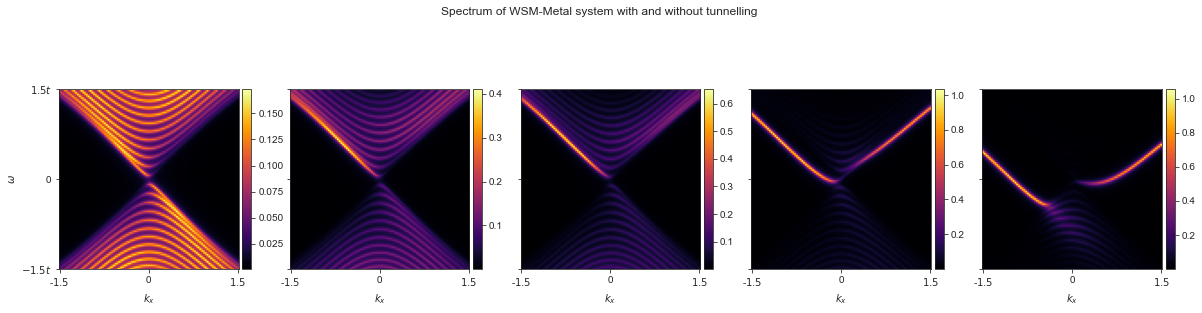

In [845]:
fig,ax=plt.subplots(nrows=1,ncols=5,sharey=True,figsize=(20,5))

plt.suptitle("Spectrum of WSM-Metal system with and without tunnelling")

im0 = ax[0].imshow(As_0,cmap='inferno')
ax[0].set_ylim(0,res)
ax[0].set_yticks([0,int(res/2),res])
ax[0].set_yticklabels(["$-1.5t$","0","$1.5t$"])
ax[0].set_xticks([0,int(res/2)-1/2,res-1])
ax[0].set_xticklabels([r"-$1.5$",r"0",r"$1.5$"])
ax[0].set_xlabel(r"$k_x$")
ax[0].set_ylabel(r"$\omega$")

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

im1 = ax[1].imshow(As_08,cmap='inferno')
ax[1].set_xlabel(r"$k_x$")
ax[1].set_xticks([0,int(res/2)-1/2,res-1])
ax[1].set_xticklabels([r"-$1.5$",r"0",r"$1.5$"])

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

im1 = ax[2].imshow(As_1,cmap='inferno')
ax[2].set_xlabel(r"$k_x$")
ax[2].set_xticks([0,int(res/2)-1/2,res-1])
ax[2].set_xticklabels([r"-$1.5$",r"0",r"$1.5$"])

divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

im1 = ax[3].imshow(As_15,cmap='inferno')
ax[3].set_xlabel(r"$k_x$")
ax[3].set_xticks([0,int(res/2)-1/2,res-1])
ax[3].set_xticklabels([r"-$1.5$",r"0",r"$1.5$"])

divider = make_axes_locatable(ax[3])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

im1 = ax[4].imshow(As_23,cmap='inferno')
ax[4].set_xlabel(r"$k_x$")
ax[4].set_xticks([0,int(res/2)-1/2,res-1])
ax[4].set_xticklabels([r"-$1.5$",r"0",r"$1.5$"])

divider = make_axes_locatable(ax[4])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

plt.show()

### Time-reversal partner

We expect $H(k)$ $\mathcal{T}$-partner $H^{*}(-k)$ to be the missing $k_x$ symmetry, since $H^{*}(-\mathbf{k})=H(-k_x,k_y,k_z)$. Take `tr = -1` in `WeylHamiltonian` to test this.

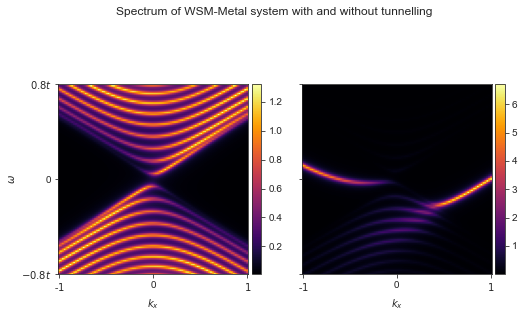

In [897]:
size=30
res=100

As_0 = np.zeros((res,res),dtype=float)
As_23 = np.zeros((res,res),dtype=float)
kxs = np.linspace(-1,1,res)

for i in range(res):
    kx = kxs[i]
    As_0[:,i] = wg.SurfaceSpectralFunctionWeylWK(size=size,res=res,kx=kx,kz=-np.pi/2,t=1,g=0,mu=-4,r=0,spin=0,side=1)
    As_23[:,i] = wg.SurfaceSpectralFunctionWeylWK(size=size,res=res,kx=kx,kz=-np.pi/2,t=1,g=0,mu=-4,r=2.3,spin=0,side=1)

fig,ax=plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(8,5))

plt.suptitle("Spectrum of WSM-Metal system with and without tunnelling")

im0 = ax[0].imshow(As_0,cmap='inferno')
ax[0].set_ylim(0,res)
ax[0].set_yticks([0,int(res/2),res])
ax[0].set_yticklabels(["$-0.8t$","0","$0.8t$"])
ax[0].set_xticks([0,int(res/2)-1/2,res-1])
ax[0].set_xticklabels([r"-$1$",r"0",r"$1$"])
ax[0].set_xlabel(r"$k_x$")
ax[0].set_ylabel(r"$\omega$")

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

im1 = ax[1].imshow(As_23,cmap='inferno')
ax[1].set_xlabel(r"$k_x$")
ax[1].set_xticks([0,int(res/2)-1/2,res-1])
ax[1].set_xticklabels([r"-$1$",r"0",r"$1$"])

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

plt.show()

It is indeed the missing $k_x$ symmetry.

## Bulk spectral function

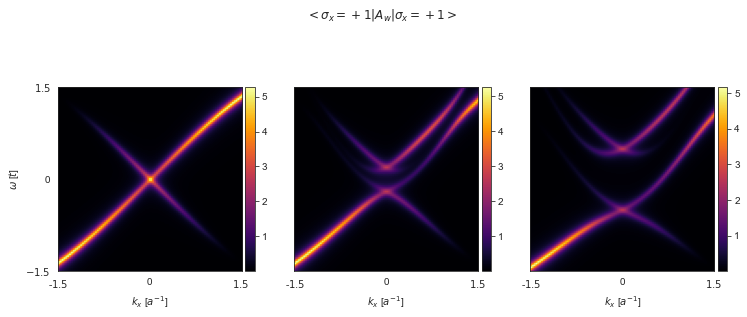

In [43]:
# res=100

# As_0 = np.zeros((res,res),dtype=float)
# kxs = np.linspace(-1.5,1.5,res)

# for i in range(res):
#     kx = kxs[i]
#     As[:,i] = wg.BulkSpectralFunctionWeylWK(res,kx,ky=0,kz=np.pi/2,r=1,mu=-4)


# plt.figure()
# plt.title(r"$<\rightarrow|A_{w}|\rightarrow>$")
# plt.imshow(As,cmap="inferno")
# plt.ylim(0,res)
# plt.xlim(0,res-1)
# plt.yticks([0,int(res/2),res],labels=["$-1.5$","0","$1.5$"])
# plt.xticks([0,int(res/2)-1/2,res-1],labels=[r"-$1.5$",r"0",r"$1.5$"])
# plt.xlabel(r"$k_x$ [$a^{-1}$]")
# plt.ylabel(r"$\omega$ [$t$]")
# plt.colorbar()
# plt.show()

res=100
mu = -4

As_0 = np.zeros((res,res),dtype=float)
As_05 = np.zeros((res,res),dtype=float)
As_1 = np.zeros((res,res),dtype=float)
kxs = np.linspace(-1.5,1.5,res)

for i in range(res):
    kx = kxs[i]
    As_0[:,i] = wg.BulkSpectralFunctionWeylWK(res=res,kx=kx,ky=0,kz=np.pi/2,r=0,mu=mu)
    As_05[:,i] = wg.BulkSpectralFunctionWeylWK(res=res,kx=kx,ky=0,kz=np.pi/2,r=0.2,mu=mu)
    As_1[:,i] = wg.BulkSpectralFunctionWeylWK(res=res,kx=kx,ky=0,kz=np.pi/2,r=0.5,mu=mu)

fig,ax=plt.subplots(nrows=1,ncols=3,sharey=True,figsize=(12,5))

plt.suptitle(r"$<\sigma_x = +1|A_{w}|\sigma_x = +1>$")

im0 = ax[0].imshow(As_0,cmap='inferno')
ax[0].set_ylim(0,res)
ax[0].set_yticks([0,int(res/2),res])
ax[0].set_yticklabels(["$-1.5$","0","$1.5$"])
ax[0].set_xticks([0,int(res/2)-1/2,res-1])
ax[0].set_xticklabels([r"-$1.5$",r"0",r"$1.5$"])
ax[0].set_xlabel(r"$k_x$ [$a^{-1}$]")
ax[0].set_ylabel(r"$\omega$ [$t$]")

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

im1 = ax[1].imshow(As_05,cmap='inferno')
ax[1].set_xlabel(r"$k_x$ [$a^{-1}$]")
ax[1].set_xticks([0,int(res/2)-1/2,res-1])
ax[1].set_xticklabels([r"-$1.5$",r"0",r"$1.5$"])

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

im2 = ax[2].imshow(As_1,cmap='inferno')
ax[2].set_xlabel(r"$k_x$ [$a^{-1}$]")
ax[2].set_xticks([0,int(res/2)-1/2,res-1])
ax[2].set_xticklabels([r"-$1.5$",r"0",r"$1.5$"])

divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

plt.show()

There is a notable asymmetry

## Continuum perturbation theory

In [119]:
r = 1
kz = np.pi/4
ks,es=wg.Spectrum(size=100,res=100,kz=kz,t=1,g=0,mu=-8,r=r)

In [128]:
def AnalyticSurfaceEnergy(kx,kz,t,mu,r,side):
    # side = -1 is left surface and vice-versa
    E0 = - side * np.sin(kx)
    g0 = - 2 * t * (np.cos(kx) + np.cos(kz)) - mu
    # shift is only nonzero fir right surface
    dE =  -(side + 1) / 2 * r**2 / np.sqrt((E0-g0)**2 - t**2)
    E = E0 + dE
    return np.real(E)

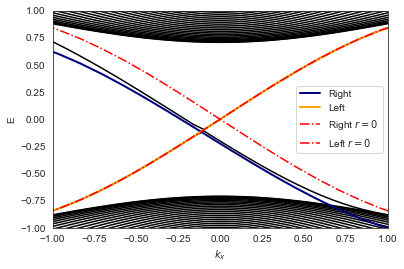

In [129]:
kxs=np.linspace(-np.pi,np.pi,50)

plt.figure()

plt.plot(ks,es,c='k')

plt.plot(kxs,AnalyticSurfaceEnergy(kxs,kz,1,-8,r,side=1),label="Right",c='navy',lw=2)
plt.plot(kxs,AnalyticSurfaceEnergy(kxs,kz,1,-8,r,side=-1),label="Left",c='orange',lw=2)

plt.plot(kxs,AnalyticSurfaceEnergy(kxs,kz,1,-8,0,side=1),label="Right $r=0$",c='r',ls='-.')
plt.plot(kxs,AnalyticSurfaceEnergy(kxs,kz,1,-8,0,side=-1),label="Left $r=0$",c='r',ls='-.')

plt.ylim(-1,1)
plt.xlim(-1,1)
plt.ylabel("E")
plt.xlabel("$k_x$")

plt.legend()
plt.show()

In [175]:
left=AnalyticSurfaceEnergy(kxs,kz,1,-6,r,side=1)
right=AnalyticSurfaceEnergy(-kxs,kz,1,-6,r,side=-1)
print(left-right)

[-0.13725143 -0.14124786 -0.14519466 -0.14905176 -0.15277456 -0.15631457
 -0.15962038 -0.16263899 -0.16531758 -0.16760555 -0.16945675 -0.17083182
 -0.17170031 -0.17204245 -0.17185031 -0.17112837 -0.16989313 -0.16817222
 -0.16600269 -0.163429   -0.16050074 -0.15727033 -0.1537909  -0.15011446
 -0.14629045 -0.14236462 -0.13837838 -0.13436836 -0.13036639 -0.12639951
 -0.12249032 -0.11865725 -0.11491504 -0.11127511 -0.107746   -0.10433382
 -0.10104256 -0.09787447 -0.09483037 -0.09190989 -0.08911171 -0.08643379
 -0.08387347 -0.08142769 -0.07909304 -0.0768659  -0.07474251 -0.07271903
 -0.0707916  -0.06895636]


## Quick tests

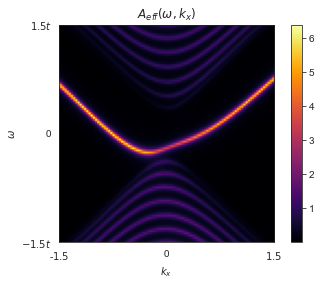

In [37]:
size = 30
res = 100
g = 0
mu = -4
r = 2.3
kz = np.pi/2+0.3
As = np.zeros((res,res),dtype=float)

for i in range(res):
    kx = np.linspace(-1.5,1.5,res)[i]
    As[:,i] = wg.SurfaceSpectralFunctionWeylWK(size=size,res=res,kx=kx,kz=kz,t=1,g=g,mu=mu,r=r,spin=0,side=1)

plt.figure()
plt.title(r"$A_{eff}(\omega, k_x)$")
plt.imshow(As,cmap="inferno")
plt.ylim(0,res)
plt.xlim(0,res-1)
plt.yticks([0,int(res/2),res],labels=["$-1.5t$","0","$1.5t$"])
plt.xticks([0,int(res/2)-1/2,res-1],labels=[r"-$1.5$",r"0",r"$1.5$"])
plt.xlabel(r"$k_x$")
plt.ylabel(r"$\omega$")
# plt.scatter(49.5,49.5)
plt.colorbar()
plt.show()

In [239]:
size=100
res=100
wrange=1
krange=1
spin=+1 # 0 for both +/-

As_0 = np.zeros((res,res),dtype=float)
As_08 = np.zeros((res,res),dtype=float)
As_1 = np.zeros((res,res),dtype=float)
As_15 = np.zeros((res,res),dtype=float)
As_23 = np.zeros((res,res),dtype=float)
kxs = np.linspace(-krange,krange,res)

for i in range(res):
    kx = kxs[i]
    As_0[:,i] = wg.SurfaceSpectralFunctionWeylWK(size=size,res=res,wrange=wrange,kx=kx,kz=-np.pi/2,t=1,g=0,mu=-8,r=0.,spin=spin,side=1)
    As_08[:,i] = wg.SurfaceSpectralFunctionWeylWK(size=size,res=res,wrange=wrange,kx=kx,kz=-np.pi/2,t=1,g=0,mu=-8,r=0.8,spin=spin,side=1)
    As_1[:,i] = wg.SurfaceSpectralFunctionWeylWK(size=size,res=res,wrange=wrange,kx=kx,kz=-np.pi/2,t=1,g=0,mu=-8,r=1,spin=spin,side=1)
    As_15[:,i] = wg.SurfaceSpectralFunctionWeylWK(size=size,res=res,wrange=wrange,kx=kx,kz=-np.pi/2,t=1,g=0,mu=-8,r=1.5,spin=spin,side=1)
    As_23[:,i] = wg.SurfaceSpectralFunctionWeylWK(size=size,res=res,wrange=wrange,kx=kx,kz=-np.pi/2,t=1,g=0,mu=-8,r=2.3,spin=spin,side=1)

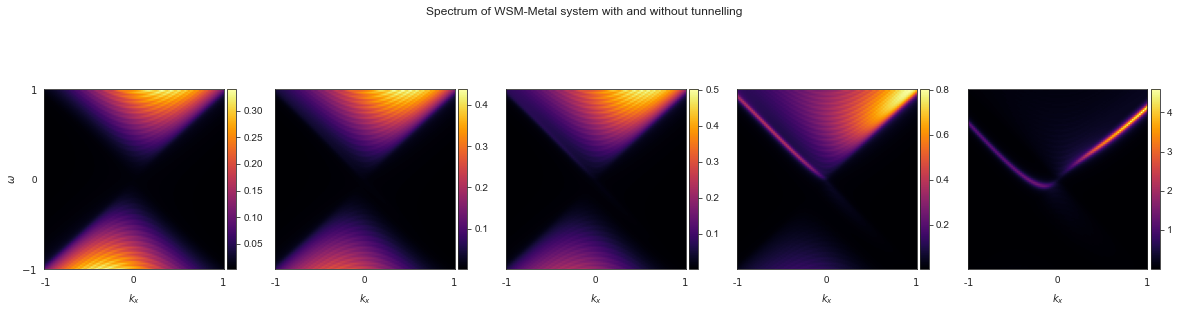

In [240]:
%matplotlib inline

fig,ax=plt.subplots(nrows=1,ncols=5,sharey=True,figsize=(20,5))

plt.suptitle("Spectrum of WSM-Metal system with and without tunnelling")

im0 = ax[0].imshow(As_0,cmap='inferno')
ax[0].set_ylim(0,res)
ax[0].set_yticks([0,int(res/2),res])
ax[0].set_yticklabels(["$-1$","0","$1$"])
ax[0].set_xticks([0,int(res/2)-1/2,res-1])
ax[0].set_xticklabels([r"-$1$",r"0",r"$1$"])
ax[0].set_xlabel(r"$k_x$")
ax[0].set_ylabel(r"$\omega$")

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

im1 = ax[1].imshow(As_08,cmap='inferno')
ax[1].set_xlabel(r"$k_x$")
ax[1].set_xticks([0,int(res/2)-1/2,res-1])
ax[1].set_xticklabels([r"-$1$",r"0",r"$1$"])

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

im1 = ax[2].imshow(As_1,cmap='inferno')
ax[2].set_xlabel(r"$k_x$")
ax[2].set_xticks([0,int(res/2)-1/2,res-1])
ax[2].set_xticklabels([r"-$1$",r"0",r"$1$"])

divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

im1 = ax[3].imshow(As_15,cmap='inferno')
ax[3].set_xlabel(r"$k_x$")
ax[3].set_xticks([0,int(res/2)-1/2,res-1])
ax[3].set_xticklabels([r"-$1$",r"0",r"$1$"])

divider = make_axes_locatable(ax[3])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

im1 = ax[4].imshow(As_23,cmap='inferno')
ax[4].set_xlabel(r"$k_x$")
ax[4].set_xticks([0,int(res/2)-1/2,res-1])
ax[4].set_xticklabels([r"-$1$",r"0",r"$1$"])

divider = make_axes_locatable(ax[4])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

plt.show()

In [235]:
size=30
res=100
r = 0.3
w = 0
mu = -8
g = 0
kz = -np.pi/2
wrange = 1
krange = np.pi

As_0 = np.zeros((res,res),dtype=float)
As_23 = np.zeros((res,res),dtype=float)
As_0_kk = np.zeros((res,res),dtype=float)
As_23_kk = np.zeros((res,res),dtype=float)
kxs = np.linspace(-1.5,1.5,res)

for i in range(res):
    kx = kxs[i]
    As_0[:,i] = wg.SurfaceSpectralFunctionWeylWK(size=size,res=res,wrange=wrange,kx=kx,kz=-np.pi/2,t=1,g=g,mu=mu,r=0,side=1)
    As_23[:,i] = wg.SurfaceSpectralFunctionWeylWK(size=size,res=res,wrange=wrange,kx=kx,kz=-np.pi/2,t=1,g=g,mu=mu,r=r,side=1)
    As_0_kk[:,i] = wg.SurfaceSpectralFunctionWeylKK(w=w,size=size,res=res,krange=krange,kx=kx,t=1,g=g,mu=mu,r=0,side=1)
    As_23_kk[:,i] = wg.SurfaceSpectralFunctionWeylKK(w=w,size=size,res=res,krange=krange,kx=kx,t=1,g=g,mu=mu,r=r,side=1)

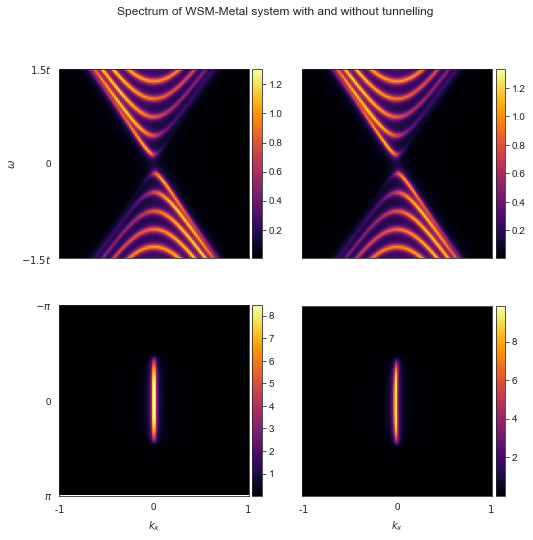

In [236]:
fig,ax=plt.subplots(nrows=2,ncols=2,sharex=True,figsize=(8,8))

plt.suptitle("Spectrum of WSM-Metal system with and without tunnelling")

im0 = ax[0,0].imshow(As_0,cmap='inferno')
ax[0,0].set_ylim(0,res)
ax[0,0].set_yticks([0,int(res/2),res])
ax[0,0].set_yticklabels(["$-1.5t$","0","$1.5t$"])
ax[0,0].set_xticks([0,int(res/2)-1/2,res-1])
ax[0,0].set_xticklabels([r"-$1$",r"0",r"$1$"])
# ax[0,0].set_xlabel(r"$k_x$")
ax[0,0].set_ylabel(r"$\omega$")

divider = make_axes_locatable(ax[0,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

im1 = ax[0,1].imshow(As_23,cmap='inferno')
# ax[0,1].set_xlabel(r"$k_x$")
ax[0,1].set_ylim(0,res)
ax[0,1].set_yticks([0,int(res/2),res])
ax[0,1].set_yticklabels([])
ax[0,1].set_xticklabels([r"-$1$",r"0",r"$1$"])

divider = make_axes_locatable(ax[0,1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

im2 = ax[1,0].imshow(As_0_kk,cmap='inferno')
ax[1,0].set_yticks([0,int(res/2),res])
ax[1,0].set_yticklabels(["$-\pi $","0","$\pi$"])
ax[1,0].set_xlabel(r"$k_x$")
ax[1,0].set_xticks([0,int(res/2)-1/2,res-1])
ax[1,0].set_xticklabels([r"-$1$",r"0",r"$1$"])

divider = make_axes_locatable(ax[1,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

im3 = ax[1,1].imshow(As_23_kk,cmap='inferno')
ax[1,1].set_xlabel(r"$k_x$")
ax[1,1].set_xticks([0,int(res/2)-1/2,res-1])
ax[1,1].set_xticklabels([r"-$1$",r"0",r"$1$"])
ax[1,1].set_ylim(0,res)
ax[1,1].set_yticks([0,int(res/2),res])
ax[1,1].set_yticklabels([])

divider = make_axes_locatable(ax[1,1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')

plt.show()

In [244]:
size=30
res=100
g=0
r=2.3
kz=-np.pi/2
mu=-8
wrange=1

As_0 = np.zeros((res,res),dtype=float)
As_23 = np.zeros((res,res),dtype=float)
kxs = np.linspace(-1.5,1.5,res)

for i in range(res):
    kx = kxs[i]
    As_0[:,i] = wg.FullSpectralFunctionWeylWK(size=size,res=res,wrange=wrange,kx=kx,kz=kz,t=1,g=g,mu=mu,r=0,side=1)
    As_23[:,i] = wg.FullSpectralFunctionWeylWK(size=size,res=res,wrange=wrange,kx=kx,kz=kz,t=1,g=g,mu=mu,r=r,side=1)

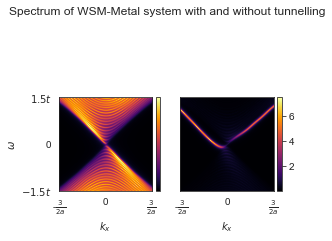

In [242]:
%matplotlib inline

fig,ax=plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(4,4))


plt.suptitle("Spectrum of WSM-Metal system with and without tunnelling")

im0 = ax[0].imshow(As_0,cmap='inferno')
ax[0].set_ylim(0,res)
ax[0].set_yticks([0,int(res/2),res])
ax[0].set_yticklabels(["$-1.5t$","0","$1.5t$"])
ax[0].set_xticks([0,int(res/2)-1/2,res-1])
ax[0].set_xticklabels([r"-$\frac{3}{2a}$",r"0",r"$\frac{3}{2a}$"])
ax[0].set_xlabel(r"$k_x$")
ax[0].set_ylabel(r"$\omega$")

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im0, cax=cax, orientation='vertical')
cbar.set_ticks([])

im1 = ax[1].imshow(As_23,cmap='inferno')
ax[1].set_xlabel(r"$k_x$")
ax[1].set_xticks([0,int(res/2)-1/2,res-1])
ax[1].set_xticklabels([r"-$\frac{3}{2a}$",r"0",r"$\frac{3}{2a}$"])

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

plt.show()

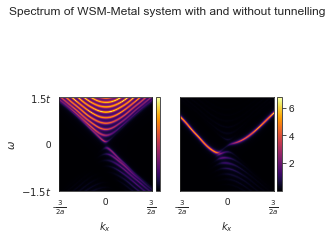

In [215]:
%matplotlib inline

fig,ax=plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(4,4))


plt.suptitle("Spectrum of WSM-Metal system with and without tunnelling")

im0 = ax[0].imshow(As_0,cmap='inferno')
ax[0].set_ylim(0,res)
ax[0].set_yticks([0,int(res/2),res])
ax[0].set_yticklabels(["$-1.5t$","0","$1.5t$"])
ax[0].set_xticks([0,int(res/2)-1/2,res-1])
ax[0].set_xticklabels([r"-$\frac{3}{2a}$",r"0",r"$\frac{3}{2a}$"])
ax[0].set_xlabel(r"$k_x$")
ax[0].set_ylabel(r"$\omega$")

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im0, cax=cax, orientation='vertical')
cbar.set_ticks([])

im1 = ax[1].imshow(As_23,cmap='inferno')
ax[1].set_xlabel(r"$k_x$")
ax[1].set_xticks([0,int(res/2)-1/2,res-1])
ax[1].set_xticklabels([r"-$\frac{3}{2a}$",r"0",r"$\frac{3}{2a}$"])

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

plt.show()

In [171]:
data=np.loadtxt("conductance.csv",delimiter=",")
es=data[0::2]
gs=data[1::2]

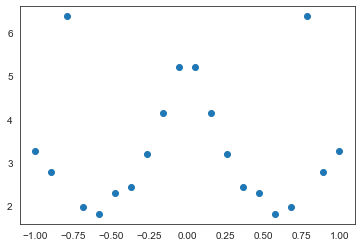

In [74]:
plt.scatter(es,gs)
# plt.ylim(0,10)

In [95]:
import weyl_conductance as wc

In [201]:
ks, Es = wc.Spectrum(size=20,res=100,t=1,g=0)

<IPython.core.display.Javascript object>


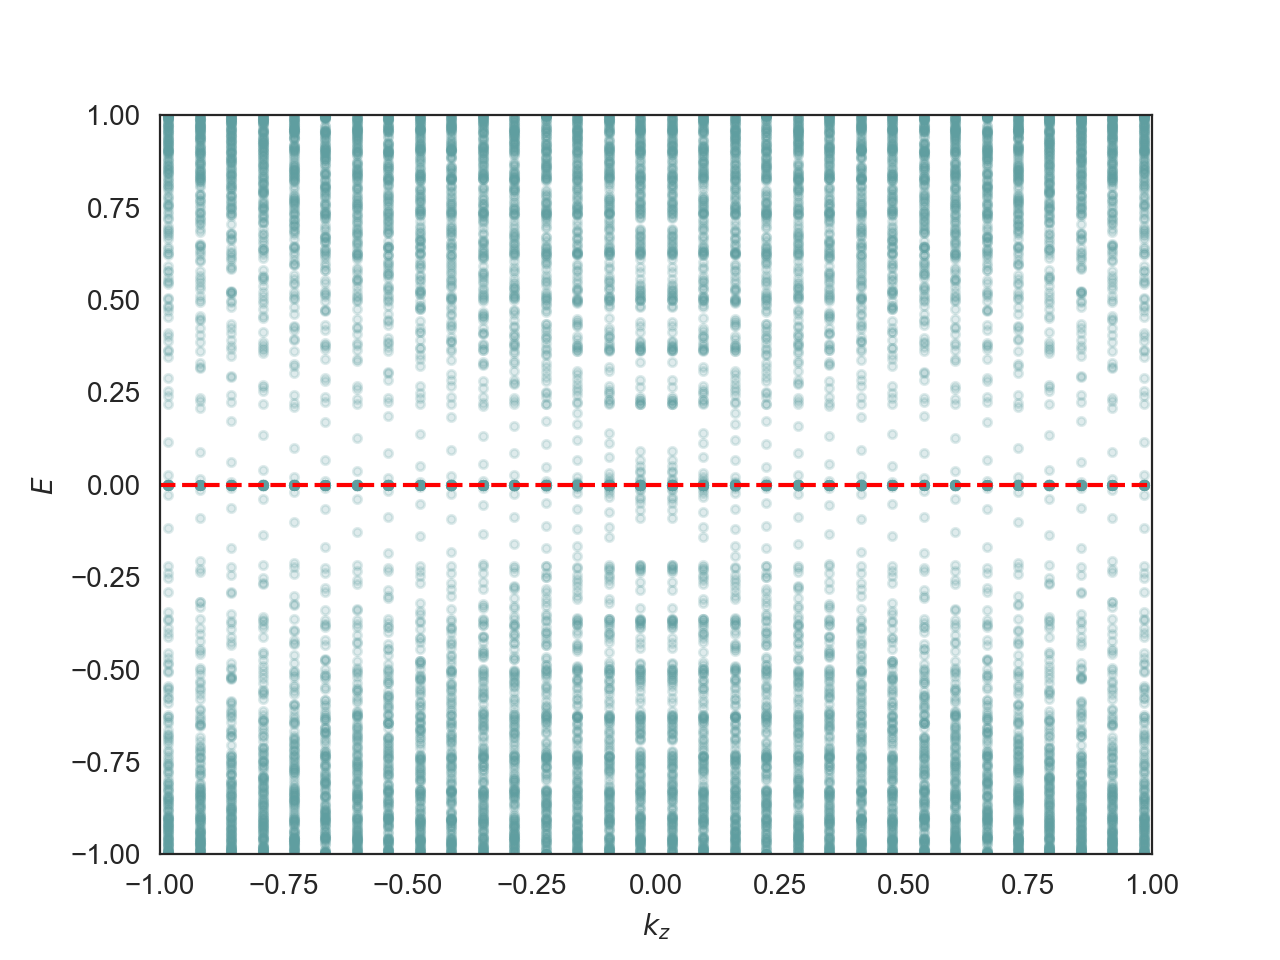

In [203]:
plt.figure()
plt.scatter(ks,Es,c='cadetblue',alpha=0.2,marker='.')
plt.ylim(-1,1)
plt.xlim(-1,1)
plt.axhline(y=0,c="r",ls="--")
plt.xlabel(r"$k_z$")
plt.ylabel(r"$E$")
plt.show()

Fermi arc gets blurred out by non-chiral states. For a fixed $k_z$ in the topological regime, there is no well-defined gap.